<a href="https://colab.research.google.com/github/mathanamathav/CP-IR-prj/blob/main/Notebooks/IR_CP_RANKING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import pprint
import requests
from bs4 import BeautifulSoup

In [2]:
df = pd.read_csv('C:\ir\Coding-contest-search-engine\data_processing\leetcode_questions.csv')

In [3]:
df.head()

,Question ID,Question Title,Question Slug,Question Text,Topic Tagged text,Difficulty Level,Success Rate,total submission,total accepted,Likes,Dislikes,Hints,Similar Questions ID,Similar Questions Text
0,1,Two Sum,two-sum,Given an array of integers nums and an integer...,"Array,Hash Table",Easy,48.5,13207990,6403821,31242,988,A really brute force way would be to search fo...,"15,18,167,170,560,653,1083,1798,1830,2116,2133...","3Sum,4Sum,Two Sum II - Input Array Is Sorted,T..."
1,2,Add Two Numbers,add-two-numbers,You are given two non-empty linked lists repre...,"Linked List,Math,Recursion",Medium,38.5,6987977,2690949,17799,3682,NaN,"43,67,371,415,445,1031,1774","Multiply Strings,Add Binary,Sum of Two Integer..."
2,3,Longest Substring Without Repeating Characters,longest-substring-without-repeating-characters,"Given a string s, find the length of the longe...","Hash Table,String,Sliding Window",Medium,33.0,9621884,3175843,22941,1027,NaN,"159,340,1034,1813,2209",Longest Substring with At Most Two Distinct Ch...
3,4,Median of Two Sorted Arrays,median-of-two-sorted-arrays,Given two sorted arrays nums1 and nums2 of siz...,"Array,Binary Search,Divide and Conquer",Hard,34.0,3941694,1340565,15987,1964,NaN,NaN,NaN
4,5,Longest Palindromic Substring,longest-palindromic-substring,"Given a string s, return the longest palindrom...","String,Dynamic Programming",Medium,31.8,5618701,1784028,17097,1005,How can we reuse a previously computed palindr...,"214,266,336,516,647","Shortest Palindrome,Palindrome Permutation,Pal..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Question ID             2238 non-null   int64  
 1   Question Title          2238 non-null   object 
 2   Question Slug           2238 non-null   object 
 3   Question Text           1758 non-null   object 
 4   Topic Tagged text       2236 non-null   object 
 5   Difficulty Level        2238 non-null   object 
 6   Success Rate            2238 non-null   float64
 7   total submission        2238 non-null   int64  
 8   total accepted          2238 non-null   int64  
 9   Likes                   2238 non-null   int64  
 10  Dislikes                2238 non-null   int64  
 11  Hints                   1235 non-null   object 
 12  Similar Questions ID    1256 non-null   object 
 13  Similar Questions Text  1256 non-null   object 
dtypes: float64(1), int64(5), object(8)
memor

In [5]:
df.columns

Index(['Question ID', 'Question Title', 'Question Slug', 'Question Text',
       'Topic Tagged text', 'Difficulty Level', 'Success Rate',
       'total submission', 'total accepted', 'Likes', 'Dislikes', 'Hints',
       'Similar Questions ID', 'Similar Questions Text'],
      dtype='object')

In [6]:
def fetch_similar_questions(question_slug):
    url = f"https://leetcode.com/problems/{question_slug}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        similar_questions = []

        # Find the HTML element that contains the similar questions
        similar_div = soup.find('div', {'id': 'lc-app'})
        if similar_div:
            similar_uls = similar_div.find_all('ul', {'class': 'v3-question-list'})
            for ul in similar_uls:
                questions = ul.find_all('li')
                for question in questions:
                    similar_questions.append(question.text.strip())

        return similar_questions
    else:
        return []

# Iterate through the DataFrame and fetch similar questions
# for index, row in df.iterrows():
#     question_slug = row['Question Slug']
#     similar_questions = fetch_similar_questions(question_slug)
#     df.at[index, 'Similar Questiont'] = '\n'.join(similar_questions)

In [7]:
graph_df = df[['Question ID' , 'Similar Questions ID' , 'Question Title']]

In [8]:
graph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Question ID           2238 non-null   int64 
 1   Similar Questions ID  1256 non-null   object
 2   Question Title        2238 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.6+ KB


In [9]:
graph_df.dropna( inplace = True )

C:\Users\Hemavarshika\AppData\Local\Temp\ipykernel_32516\1679919594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df.dropna( inplace = True )


In [10]:
graph_df['Similar Questions ID'] = graph_df['Similar Questions ID'].str.split(',')

graph_df = graph_df.explode('Similar Questions ID')

graph_df = graph_df.rename(columns={'Similar Questions ID': 'Similar Question ID'})

graph_df = graph_df.reset_index(drop=True)

C:\Users\Hemavarshika\AppData\Local\Temp\ipykernel_32516\1478512862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['Similar Questions ID'] = graph_df['Similar Questions ID'].str.split(',')


In [11]:
graph_df.head()

,Question ID,Similar Question ID,Question Title
0,1,15,Two Sum
1,1,18,Two Sum
2,1,167,Two Sum
3,1,170,Two Sum
4,1,560,Two Sum


In [12]:
graph_df.tail()

,Question ID,Similar Question ID,Question Title
2627,2376,1779,Number of Times a Driver Was a Passenger
2628,2376,1785,Number of Times a Driver Was a Passenger
2629,2376,1795,Number of Times a Driver Was a Passenger
2630,2385,370,Count Positions on Street With Required Bright...
2631,2385,2075,Count Positions on Street With Required Bright...


In [13]:
graph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Question ID          2632 non-null   int64 
 1   Similar Question ID  2632 non-null   object
 2   Question Title       2632 non-null   object
dtypes: int64(1), object(2)
memory usage: 61.8+ KB


In [14]:
graph_df['Similar Question ID'] = graph_df['Similar Question ID'].astype('int')

In [15]:
# graph_df.to_csv('graph_ranking.csv')

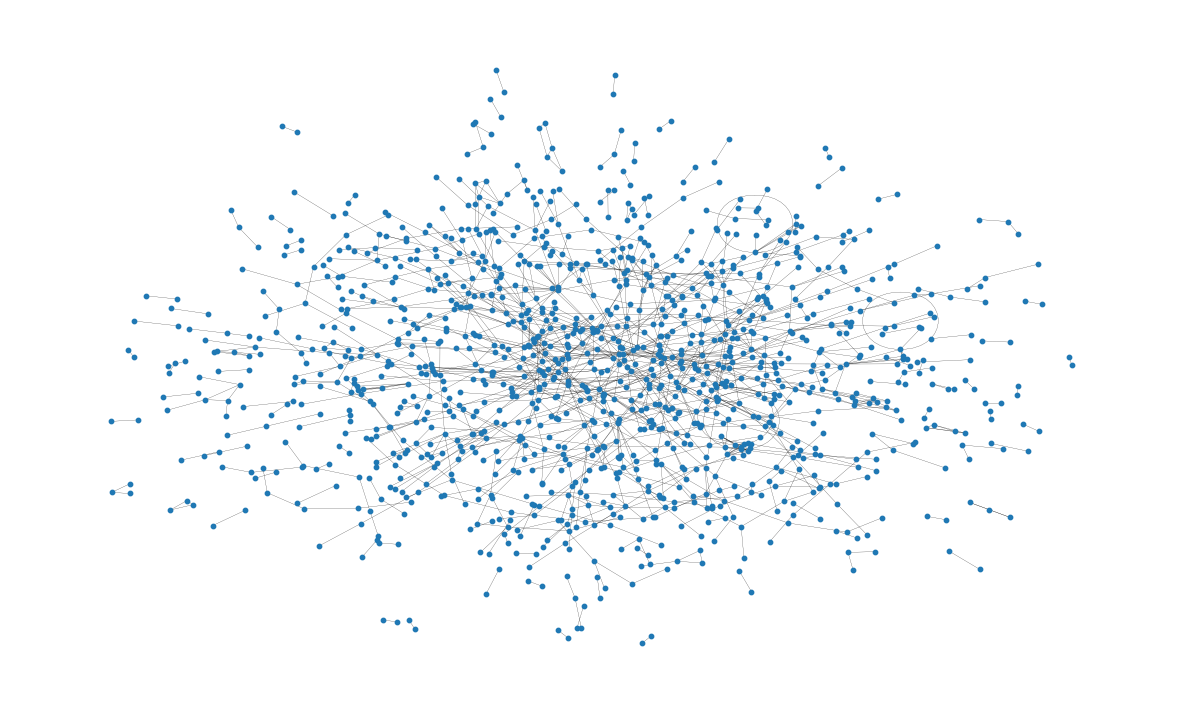

In [16]:
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
G = nx.from_pandas_edgelist(graph_df, "Question ID", "Similar Question ID")


pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [17]:
len(G.nodes())

1256

In [18]:
pagerank = nx.pagerank(G)
pagerank

{1: 0.0029672027839022764,
 15: 0.0010476476041887761,
 18: 0.00112428029647694,
 167: 0.0007729059692295241,
 170: 0.00081724927177192,
 560: 0.0021136634000388076,
 653: 0.0010760020480384954,
 1083: 0.0010103506115620175,
 1798: 0.0005622081676436141,
 1830: 0.0008211732800732007,
 2116: 0.0012777060733545134,
 2133: 0.00032958585983170694,
 2320: 0.0005751120904419578,
 2: 0.0016292682719285891,
 43: 0.0009234420554157313,
 67: 0.0009194409190263482,
 371: 0.000317255753260985,
 415: 0.0007097055605497517,
 445: 0.0005393355805805228,
 1031: 0.0009234420554157313,
 1774: 0.0007837136192780957,
 3: 0.0013082881138020501,
 159: 0.0009819970335805703,
 340: 0.0013886717777800747,
 1034: 0.0012800176976312599,
 1813: 0.0003419543065337228,
 2209: 0.000973523684785636,
 5: 0.0014096426469997667,
 214: 0.0009262201161231514,
 266: 0.0011489163926244154,
 336: 0.0008950081714200113,
 516: 0.0021824114358420113,
 647: 0.0006241201266102934,
 7: 0.0009925671019813888,
 8: 0.0011000653196775

In [19]:
len(pagerank)

1256

In [20]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create a Plotly figure
fig = make_subplots(rows=1, cols=1)
pos = nx.spring_layout(G)

# Create node positions for Plotly
node_x = [pos[k][0] for k in G.nodes]
node_y = [pos[k][1] for k in G.nodes]

# Create a list of labels with PageRank values
labels = [f'Node {k}<br>PageRank: {pagerank[k]:.3f}' for k in G.nodes]

# Create a scatter plot for nodes
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(size=[v * 5000 for v in pagerank.values()], showscale=True, colorscale='YlGnBu' ),
    text=labels,
    hoverinfo='text'
)

# Create edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create an edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Add traces to the figure
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Update layout
fig.update_layout(
    showlegend=False,
    hovermode='closest',
    title_text='Interactive PageRank Graph',
    width=800, height=600
)

# Show the interactive plot
fig.show()

In [21]:
def flip(p):
    return np.random.random() < p

from collections import Counter

def random_walk(G, alpha=0.85, iters=1000):
    counter = Counter()
    node = next(iter(G))

    for _ in range(iters):
        if flip(alpha):
            node = np.random.choice(list(G[node]))
        else:
            node = np.random.choice(list(G))

        counter[node] += 1

    total = sum(counter.values())
    for key in counter:
        counter[key] /= total
    return counter

In [22]:
ranks_rw = random_walk(G)

# Create a Plotly figure
fig = make_subplots(rows=1, cols=1)
pos = nx.spring_layout(G)

# Create node positions for Plotly
node_x = [pos[k][0] for k in G.nodes]
node_y = [pos[k][1] for k in G.nodes]

# Create a list of labels with PageRank values
labels = [f'Node {k}<br>PageRank: {ranks_rw[k]:.3f}' for k in G.nodes]

# Create a scatter plot for nodes
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    marker=dict(size=[v * 5000 for v in ranks_rw.values()], showscale=True, colorscale='YlGnBu' ),
    text=labels,
    hoverinfo='text'
)

# Create edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Create an edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# Add traces to the figure
fig.add_trace(edge_trace)
fig.add_trace(node_trace)

# Update layout
fig.update_layout(
    showlegend=False,
    hovermode='closest',
    title_text='Interactive Random Walk PageRank Graph',
)

# Show the interactive plot
fig.show()

In [23]:
# Calculate the adjacency matrix
M = nx.to_numpy_array(G)
N = len(G)

# Initialize the probability vector p
p = np.full(N, 1/N)

# Set the damping factor
alpha = 0.85

# Create the Google Matrix GM
GM = alpha * M + (1 - alpha) * p

# Initialize the PageRank vector x
x = np.full(N, 1/N)

# Perform PageRank iteration
for i in range(10):
    x = GM.T @ x

# Normalize the ranks
ranks_am = x / x.sum()

print(ranks_am)

[2.00885029e-03 8.31345919e-04 7.56971313e-04 ... 2.45475534e-05
 2.45475534e-05 2.52539385e-05]


In [24]:
import pandas as pd

s1 = pd.Series(pagerank.values())
s2 = pd.Series(ranks_am)

df = pd.DataFrame(dict(PageRank=s1, AdjMatrix=s2))
df['Diff'] = df['AdjMatrix'] - df['PageRank']
df*100

,PageRank,AdjMatrix,Diff
0,0.296720,0.200885,-0.095835
1,0.104765,0.083135,-0.021630
2,0.112428,0.075697,-0.036731
3,0.077291,0.088718,0.011428
4,0.081725,0.071936,-0.009789
...,...,...,...
1251,0.079618,0.002455,-0.077163
1252,0.070635,0.006956,-0.063680
1253,0.079618,0.002455,-0.077163
1254,0.079618,0.002455,-0.077163


In [25]:
# Calculate the adjacency matrix
M = nx.to_numpy_array(G)
# Damping factor
alpha = 0.85

# Calculate the transition matrix
N = len(G)
P = np.ones((N, N)) / N
M = alpha * M + (1 - alpha) * P

# Compute PageRank using the eigenvalue method
eigenvalues, eigenvectors = np.linalg.eig(M.T)
ind = np.argmax(eigenvalues)
largest_eigenvector = np.real(eigenvectors[:, ind])
ranks_ev = largest_eigenvector / largest_eigenvector.sum()

In [26]:
import pandas as pd

s1 = pd.Series(pagerank.values())
s2 = pd.Series(ranks_ev)

df = pd.DataFrame(dict(PageRank=s1, Eigenvector=s2))
df['Diff'] = df['Eigenvector'] - df['PageRank']
df*100

,PageRank,Eigenvector,Diff
0,0.296720,0.009712,-0.287008
1,0.104765,0.004973,-0.099792
2,0.112428,0.004816,-0.107612
3,0.077291,0.004696,-0.072594
4,0.081725,0.004385,-0.077340
...,...,...,...
1251,0.079618,0.002256,-0.077361
1252,0.070635,0.002895,-0.067740
1253,0.079618,0.002256,-0.077361
1254,0.079618,0.002256,-0.077361
